In [32]:
import nltk                              
import matplotlib.pyplot as plt          
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import re
from nltk.tokenize import regexp_tokenize
import seaborn as sns
from docx import Document

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lesia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
with open('C:/Users/Lesia/Desktop/top 10 books/different languages/english_pride_and_prejudice_[ebooksread.com].txt', 'r', encoding='utf-8') as file:
    book_text_1 = file.read()

with open('C:/Users/Lesia/Desktop/top 10 books/different languages/finnish_pride_and_prejudice_1.txt', 'r', encoding='utf-8') as file:
    book_text_2 = file.read()

with open('C:/Users/Lesia/Desktop/top 10 books/different languages/ukranian_pride_and_prejudice.txt', 'r', encoding='utf-8') as file:
    book_text_3 = file.read()
 
with open('C:/Users/Lesia/Desktop/top 10 books/different languages/bulgarian_pride_and_prejudice.txt', 'r', encoding='utf-8') as file:
    book_text_4 = file.read()

Calculate the lenghts of the words in the books (gridchart)
Calculate how many words are in sentences

In [48]:
# calculate the lenghts of the words in the books (gridchart) (how many letters in the word and its frequency)
def word_length(book_text):
    words = word_tokenize(book_text)
    word_lengths = [len(w) for w in words]
    return pd.DataFrame(word_lengths)

# Example usage:
df1 = word_length(book_text_1)
df2 = word_length(book_text_2)
df3 = word_length(book_text_3)
df4 = word_length(book_text_4)

# print(df1)
# print(df2)
# print(df3)
# print(df4)

         0
0        9
1        2
2        9
3        7
4        1
...     ..
106372  10
106373   2
106374   7
106375  10
106376   1

[106377 rows x 1 columns]


In [49]:
# basic statistics on the words in the nselected novels
display (f"English {df1.describe()}")
display (f"Finnish {df2.describe()}")
display (f"Ukranian {df3.describe()}")
display (f"Bulgarian {df4.describe()}")

"'Frankenstein'                    0\ncount  144592.000000\nmean        3.917444\nstd         2.516585\nmin         1.000000\n25%         2.000000\n50%         3.000000\n75%         5.000000\nmax        19.000000"

"'Romeo and Juliet'                   0\ncount  106377.000000\nmean        5.741758\nstd         3.571971\nmin         1.000000\n25%         3.000000\n50%         5.000000\n75%         8.000000\nmax        27.000000"

"'Pride and Prejudice'                    0\ncount  134576.000000\nmean        4.410876\nstd         3.124803\nmin         1.000000\n25%         2.000000\n50%         4.000000\n75%         7.000000\nmax        25.000000"

"'The Scarlet Letter'                    0\ncount  124041.000000\nmean        4.031256\nstd         2.996405\nmin         1.000000\n25%         1.000000\n50%         3.000000\n75%         6.000000\nmax        22.000000"

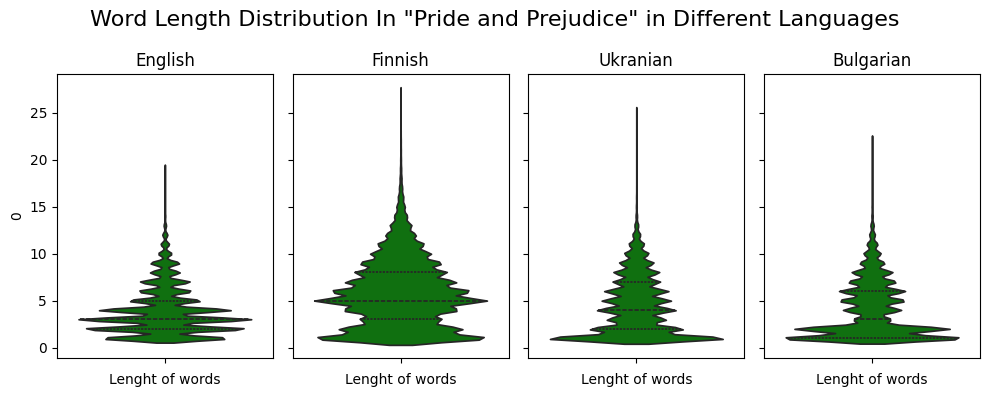

In [54]:
# violin plot of the basic statistics on the selected novels
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4), sharey=True)

axes = axes.flatten()

for i, df in enumerate([df1, df2, df3, df4]): 
    column = df.columns[0] 
    sns.violinplot(df[column], ax=axes[i], color='green',inner="quartile") 
    axes[i].set_xlabel('Lenght of words')
    # axes[i].set_title(f'Dataset {i + 1}: {column}')
    

axes[0].set_title('English')
axes[1].set_title('Finnish')
axes[2].set_title('Ukranian')
axes[3].set_title('Bulgarian')

fig.suptitle('Word Length Distribution In "Pride and Prejudice" in Different Languages', fontsize=16)

plt.tight_layout()
plt.show()

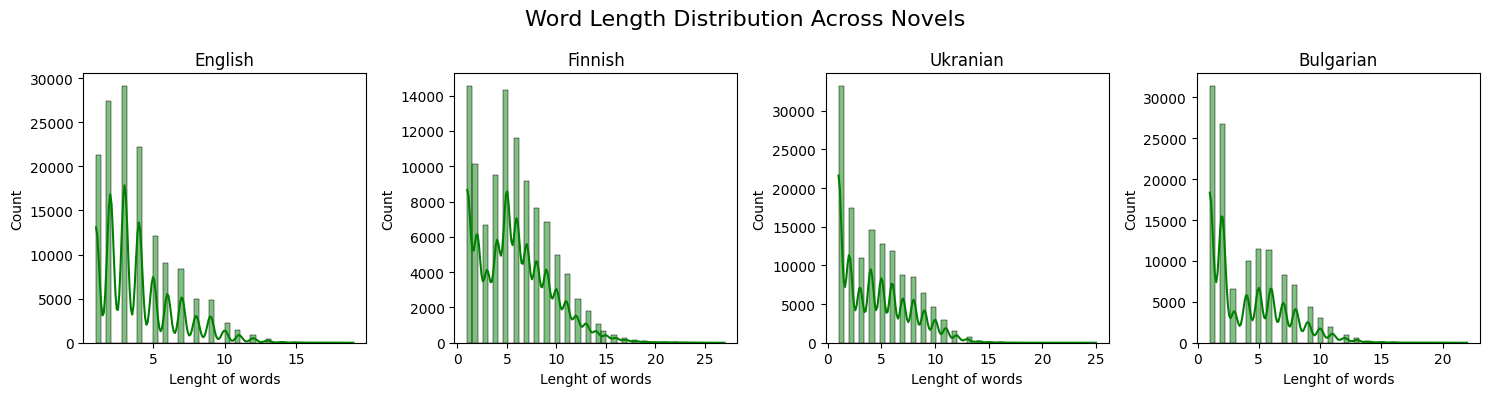

In [55]:
# how many letters are in the words and distribution? 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

axes = axes.flatten()

for i, df in enumerate([df1, df2, df3, df4]): 
    column = df.columns[0] 
    sns.histplot(df[column], ax=axes[i], bins = 50, kde=True, color='green') 
    axes[i].set_xlabel('Length of words')
    # axes[i].set_title(f'Dataset {i + 1}: {column}')
    

axes[0].set_title('English')
axes[1].set_title('Finnish')
axes[2].set_title('Ukranian')
axes[3].set_title('Bulgarian')

fig.suptitle('Word Length Distribution Across Novels', fontsize=16)

plt.tight_layout()
plt.show()

Calculate lenghts of sentences

In [52]:
def sent_length(book_text):
    sent = sent_tokenize(book_text)
    sent_lengths = [len(word_tokenize(sentence)) for sentence in sent]
    return pd.DataFrame(sent_lengths)

df_sent_1 = word_length(book_text_1)
df_sent_2 = word_length(book_text_2)
df_sent_3 = word_length(book_text_3)
df_sent_4 = word_length(book_text_4)

In [56]:
# basic statistics
display (f"English {df_sent_1.describe()}")
display (f"Finnish {df_sent_2.describe()}")
display (f"Ukranian {df_sent_3.describe()}")
display (f"Bulgarian {df_sent_4.describe()}")

'English                    0\ncount  144592.000000\nmean        3.917444\nstd         2.516585\nmin         1.000000\n25%         2.000000\n50%         3.000000\n75%         5.000000\nmax        19.000000'

'Finnish                    0\ncount  106377.000000\nmean        5.741758\nstd         3.571971\nmin         1.000000\n25%         3.000000\n50%         5.000000\n75%         8.000000\nmax        27.000000'

'Ukranian                    0\ncount  134576.000000\nmean        4.410876\nstd         3.124803\nmin         1.000000\n25%         2.000000\n50%         4.000000\n75%         7.000000\nmax        25.000000'

'Bulgarian                    0\ncount  124041.000000\nmean        4.031256\nstd         2.996405\nmin         1.000000\n25%         1.000000\n50%         3.000000\n75%         6.000000\nmax        22.000000'

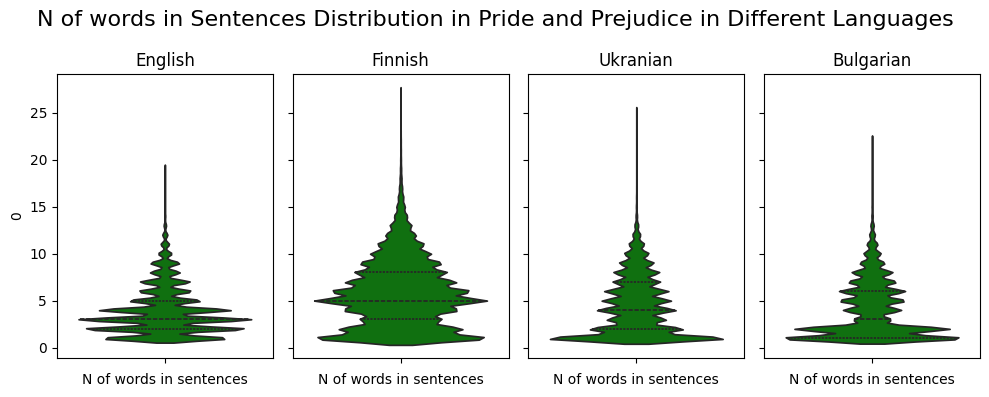

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4), sharey=True)

axes = axes.flatten()

for i, df in enumerate([df_sent_1, df_sent_2, df_sent_3, df_sent_4]): 
    column = df.columns[0] 
    sns.violinplot(df[column], ax=axes[i], color='green',inner="quartile") 
    axes[i].set_xlabel('N of words in sentences')
    # axes[i].set_title(f'Dataset {i + 1}: {column}')
    

axes[0].set_title('English')
axes[1].set_title('Finnish')
axes[2].set_title('Ukranian')
axes[3].set_title('Bulgarian')

fig.suptitle('N of words in Sentences Distribution in Pride and Prejudice in Different Languages', fontsize=16)

plt.tight_layout()
plt.show()

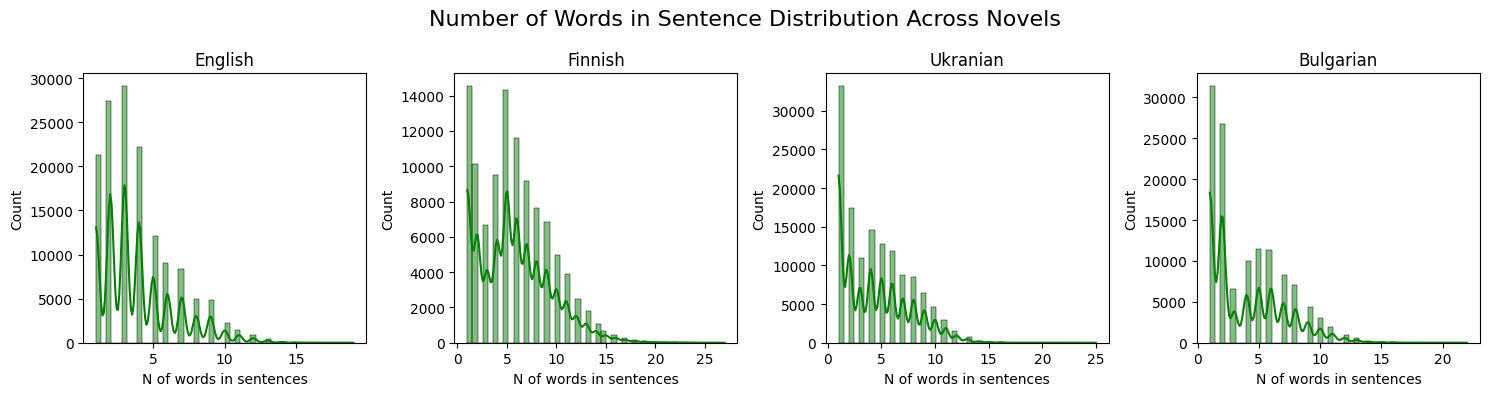

In [59]:
# distribution chart
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))  
axes = axes.flatten()

for i, df in enumerate([df_sent_1, df_sent_2, df_sent_3, df_sent_4]):
    column = df.columns[0] 
    sns.histplot(df[column], ax=axes[i], bins = 50, kde=True, color='green') 
    axes[i].set_xlabel('N of words in sentences')
    # axes[i].set_title(f'Dataset {i + 1}: {column}')
    
axes[0].set_title('English')
axes[1].set_title('Finnish')
axes[2].set_title('Ukranian')
axes[3].set_title('Bulgarian')

fig.suptitle('Number of Words in Sentence Distribution Across Novels', fontsize=16)

plt.tight_layout()
plt.show()

On data sources and formats
English and Finish versions were downloaded via the website of The Gutenberg Project. 
The Bulgarian version was downloaded from the web site chitanka.info
Ukrainian version was downloaded from the website ukrlib.com.ua
Copyright and forewords have been deleted from the books. All files were stored in the txt format. 

Analysis
It is important to mention that the presented language belongs to different linguistical families, which play a big role in the presented distributions. 
However, all presented distributions (both on the word length and the number of words in the sentences) are right-skewed.
Most of the words in the English version of "Pride and Prejudice" (which is also an original version) are up to 10 letters, while for other languages it coverage up to 15 characters in the word. Hovewer, Finnish tends to have longer words among all presented. 
This is visible from the second chart, where Finnish have got wirer range from 0-15 compared to other languages, where most of the words were between 1 and 10 characters long. 

Regarding number of the words in the sentences, a similar situation can be noticed. 
Finnish tend to use longer words and longer sentences. While Ukranian and Bulgarian belong to the same linguistic family, their distributions indeed illustrate similar patterns. But unlike Bulgarian, in the Ukrainian version of the book, there are rare cases where long words (up to 25 characters) and long sentences (up to 25 words in one) are being used.